In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('inventory_data_noisy.csv')
df.head()


,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [3]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [4]:
df.dtypes

Dealer_ID              object
Product_ID             object
Date           datetime64[ns]
Quantity              float64
Consumption           float64
Location               object
dtype: object

In [5]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date           410
Quantity        92
Consumption     92
Location       184
dtype: int64

In [6]:
df['Date'] = df['Date'].fillna(method='ffill')

C:\Users\CVR\AppData\Local\Temp\ipykernel_1856\1291857192.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')


In [7]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity        92
Consumption     92
Location       184
dtype: int64

In [8]:
mean = df['Quantity'].mean()

In [9]:
median = df['Quantity'].median()

In [10]:
df['Quantity'] = df['Quantity'].fillna(median)

In [11]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption     92
Location       184
dtype: int64

In [12]:
cmedian = df['Consumption'].median()

In [13]:
df['Consumption'] = df['Consumption'].fillna(cmedian)

In [14]:
df.isna().sum()

Dealer_ID        0
Product_ID       0
Date             0
Quantity         0
Consumption      0
Location       184
dtype: int64

In [15]:
mode = df['Location'].mode()

In [18]:
df['Location'] = df['Location'].fillna(mode[0])

In [19]:
df.isna().sum()

Dealer_ID      0
Product_ID     0
Date           0
Quantity       0
Consumption    0
Location       0
dtype: int64

In [20]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [22]:
min_consumption = df['Consumption'].min()
max_consumption = df['Consumption'].max()
range_consumption = (min_consumption, max_consumption)
range_consumption

(5.0, 190.0)

In [68]:
def classify_consumption(value):
    if value <= (max_consumption * 0.33):
        return 'Low'
    elif value <= (max_consumption * 0.66):
        return 'Medium'
    else:
        return 'High'

# Add classification column
df['Consumption Classification'] = df['Consumption'].apply(classify_consumption)

# Display the results
print(df[['Consumption', 'Consumption Classification']].head())

   Consumption Consumption Classification
0          8.0                        Low
1          9.0                        Low
2         17.0                        Low
3         13.0                        Low
4         10.0                        Low


In [71]:
print(df['Consumption Classification'].unique())

['Low']


In [24]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption Classification
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,Low
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Low
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low


In [59]:
df['Quantity_consumption_ratios'] = df['Quantity']/df['Consumption']

In [60]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption Classification,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,Low,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Low,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


In [26]:
duplicates = df.duplicated()
duplicates.sum()

341

In [28]:
df = df.drop_duplicates()

Identify Outliers using IQR for Quantity

In [29]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))
outliers_quantity = df[outlier_condition]

In [30]:
Q1_c = df['Consumption'].quantile(0.25)
Q3_c = df['Consumption'].quantile(0.75)
IQR_c = Q3_c - Q1_c
outlier_condition_c = (df['Consumption'] < (Q1_c - 1.5 * IQR_c)) | (df['Consumption'] > (Q3_c + 1.5 * IQR_c))
outliers_consumption = df[outlier_condition_c]

Univariete Analysis

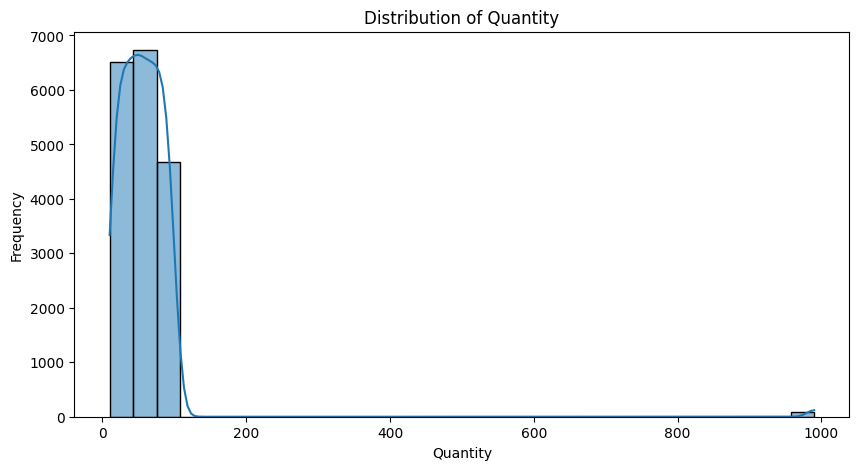

In [ ]:
# Histogram for Quantity
plt.figure(figsize=(10, 5))
sns.histplot(df['Quantity'], bins=30, kde=True) #determines how many such groups (or intervals) the data is divided into.
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In the context of histograms, a bin represents a range of values that group together data points falling within that range. The bins parameter in sns.histplot() determines how many such groups (or intervals) the data is divided into.

How bins=30 Works:
The range of values in df['Quantity'] is divided into 30 equal intervals (bins).
Each bin counts how many data points (or observations) fall within that range.
The height of the bar in the histogram represents the frequency of values in each bin.
Example:
If df['Quantity'] has values between 0 and 300, and bins=30:

Each bin will cover a range of 10 units ((300-0)/30 = 10).
The first bin will count values from 0 to 10, the second from 10 to 20, and so on.
The histogram will display 30 bars, each showing the frequency of values in its range.

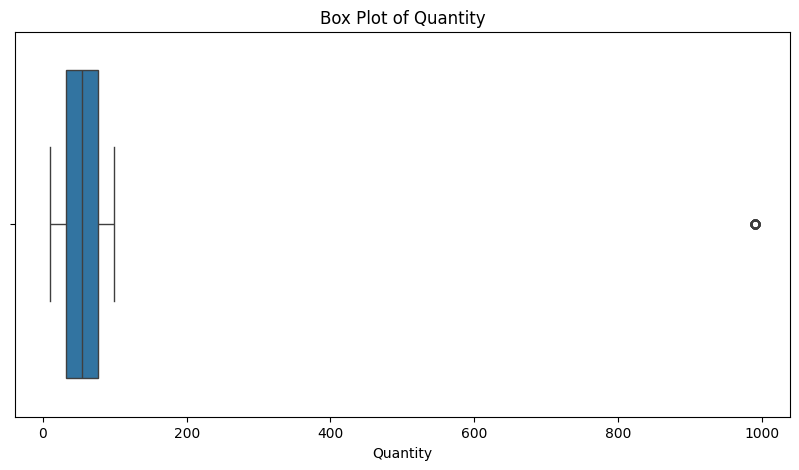

In [34]:
# Box Plot for Quantity
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

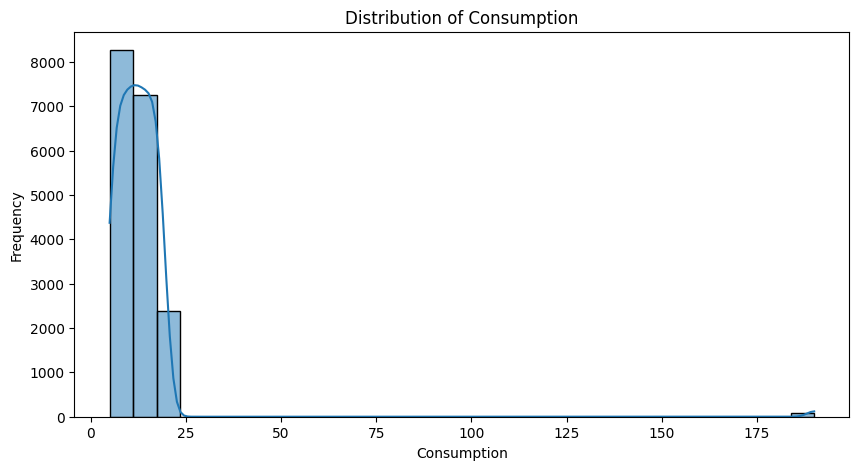

In [38]:

# Histogram for Consumption
plt.figure(figsize=(10, 5))
sns.histplot(df['Consumption'], bins=30, kde=True)
plt.title('Distribution of Consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

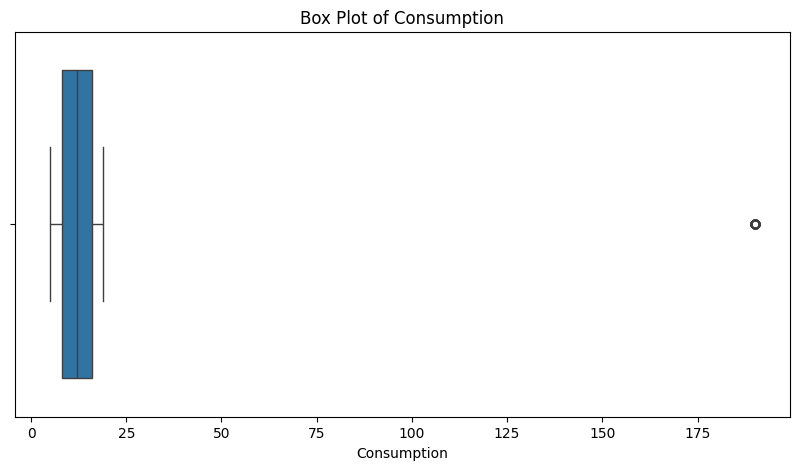

In [39]:
# Box Plot for Consumption
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Consumption'])
plt.title('Box Plot of Consumption')
plt.xlabel('Consumption')
plt.show()

Bivariate Analysis

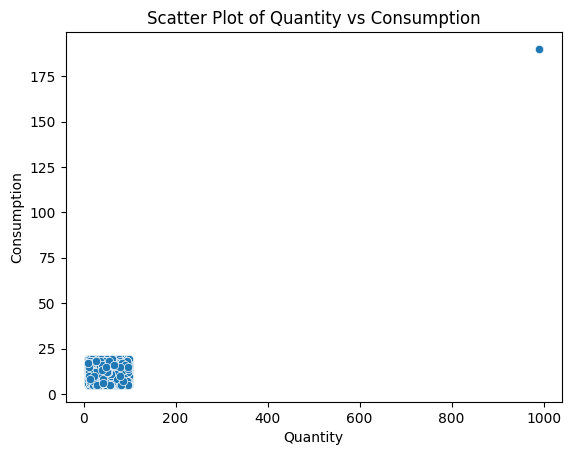

In [41]:
# Scatter Plot for Quantity vs Consumption
# plt.figure(figsize=(10, 5))
sns.scatterplot(x='Quantity', y='Consumption', data=df)
plt.title('Scatter Plot of Quantity vs Consumption')
plt.xlabel('Quantity')
plt.ylabel('Consumption')
plt.show()


### How to Fix Correlation Calculation Issues

#### Drop Non-Numeric Columns Before Computing Correlation

In [44]:
df.dtypes

Dealer_ID                             object
Product_ID                            object
Date                          datetime64[ns]
Quantity                             float64
Consumption                          float64
Location                              object
Consumption Classification            object
dtype: object

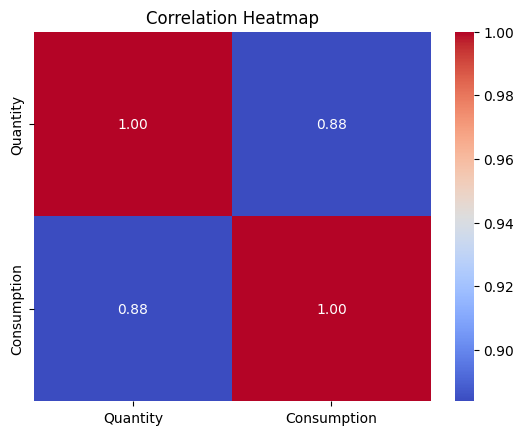

In [45]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


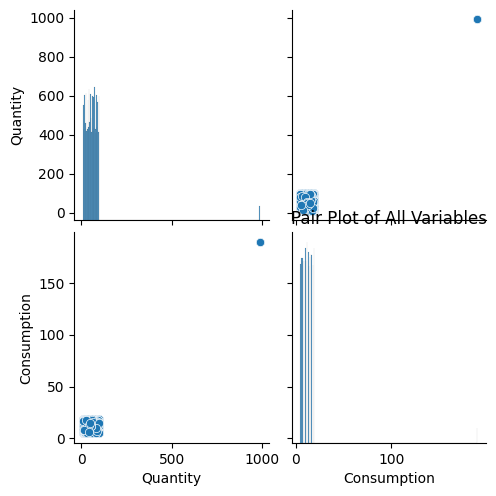

In [46]:
# Pair Plot
sns.pairplot(df)
plt.title('Pair Plot of All Variables')
plt.show()

by the graphs we can see outlier is present (remove it)

In [47]:
# Remove Outliers using IQR for Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]

In [48]:
# Remove Outliers using IQR for Consumption
Q1_c = df['Consumption'].quantile(0.25)
Q3_c = df['Consumption'].quantile(0.75)
IQR_c = Q3_c - Q1_c
outlier_condition_c = (df['Consumption'] < (Q1_c - 1.5 * IQR_c)) | (df['Consumption'] > (Q3_c + 1.5 * IQR_c))
df = df[~outlier_condition_c]

after removing outlier

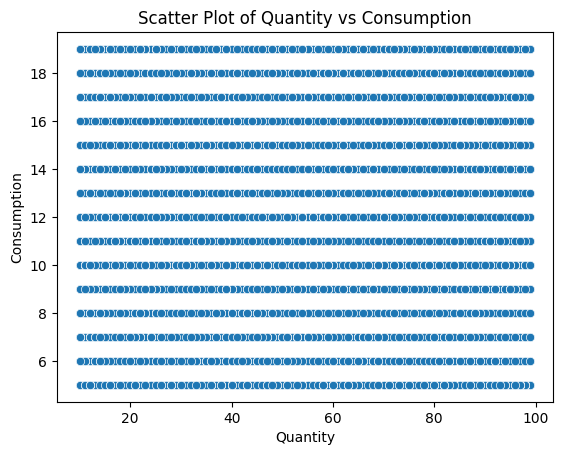

In [49]:
sns.scatterplot(x='Quantity', y='Consumption', data=df)
plt.title('Scatter Plot of Quantity vs Consumption')
plt.xlabel('Quantity')
plt.ylabel('Consumption')
plt.show()

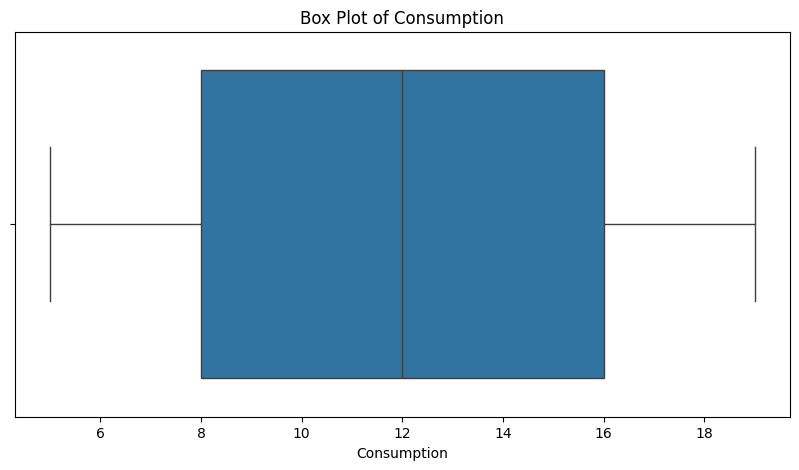

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Consumption'])
plt.title('Box Plot of Consumption')
plt.xlabel('Consumption')
plt.show()

Text(0.5, 1.0, 'Boxplot of Consumption')

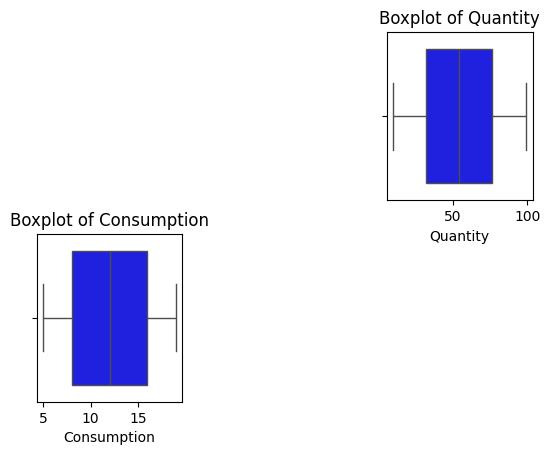

In [53]:
## Boxplots to visualize outliers
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Quantity', color='blue')
plt.title('Boxplot of Quantity')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Consumption', color='blue')
plt.title('Boxplot of Consumption')

Text(0.5, 1.0, 'Distribution of Consumption')

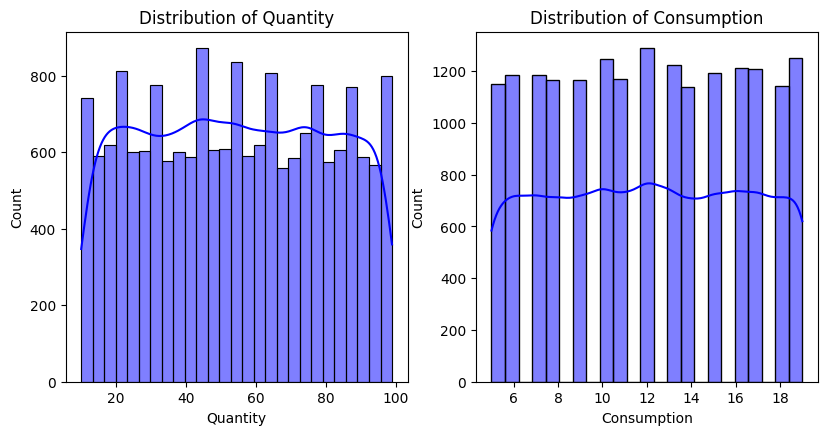

In [55]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Quantity'], kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(2, 3, 2)
sns.histplot(df['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

Categorical variables present in the data are:

In [56]:
df['Dealer_ID'].unique()

array(['D000', 'D001', 'D002', 'D003', 'D004', 'D005', 'D006', 'D007',
       'D008', 'D009'], dtype=object)

In [57]:
df['Product_ID'].unique()

array(['P000', 'P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007',
       'P008', 'P009', 'P010', 'P011', 'P012', 'P013', 'P014', 'P015',
       'P016', 'P017', 'P018', 'P019'], dtype=object)

In [58]:
df['Location'].unique()

array(['Chicago', 'Los Angeles', 'New York'], dtype=object)

subplot(nrows, ncols, index)


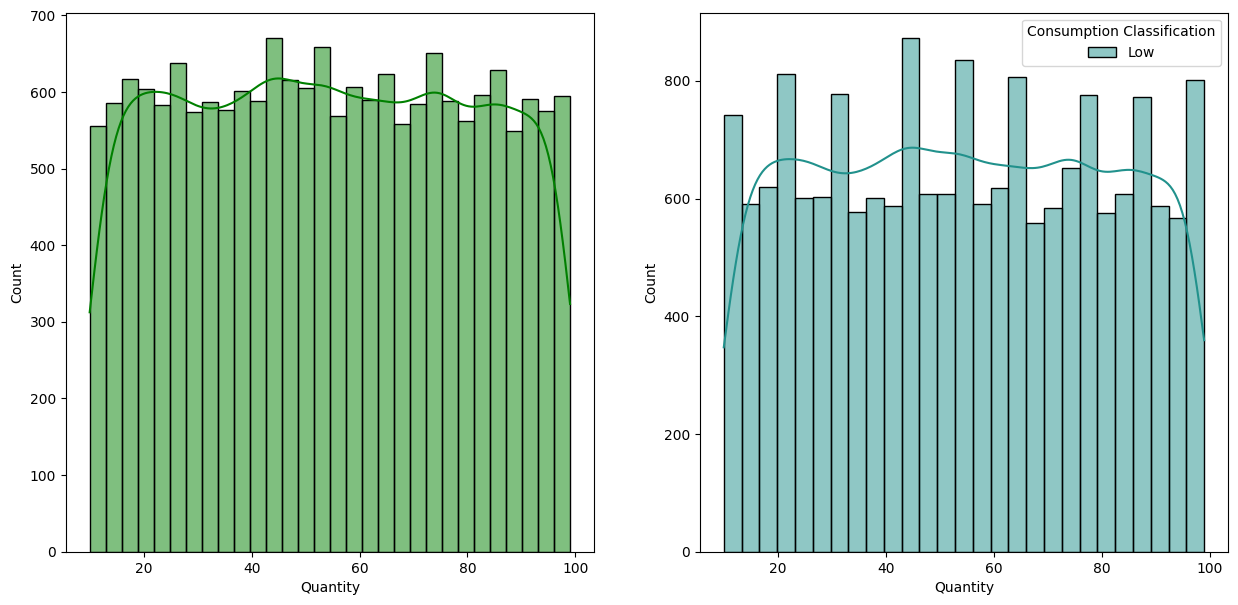

In [63]:
## Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Quantity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption Classification',palette='viridis')
plt.show()

In [62]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption Classification,Quantity_consumption_ratios
0,D000,P000,2022-01-01,62.0,8.0,Chicago,Low,7.750000
1,D000,P000,2022-01-02,70.0,9.0,Chicago,Low,7.777778
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,Low,0.705882
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,Low,5.692308
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,Low,5.700000


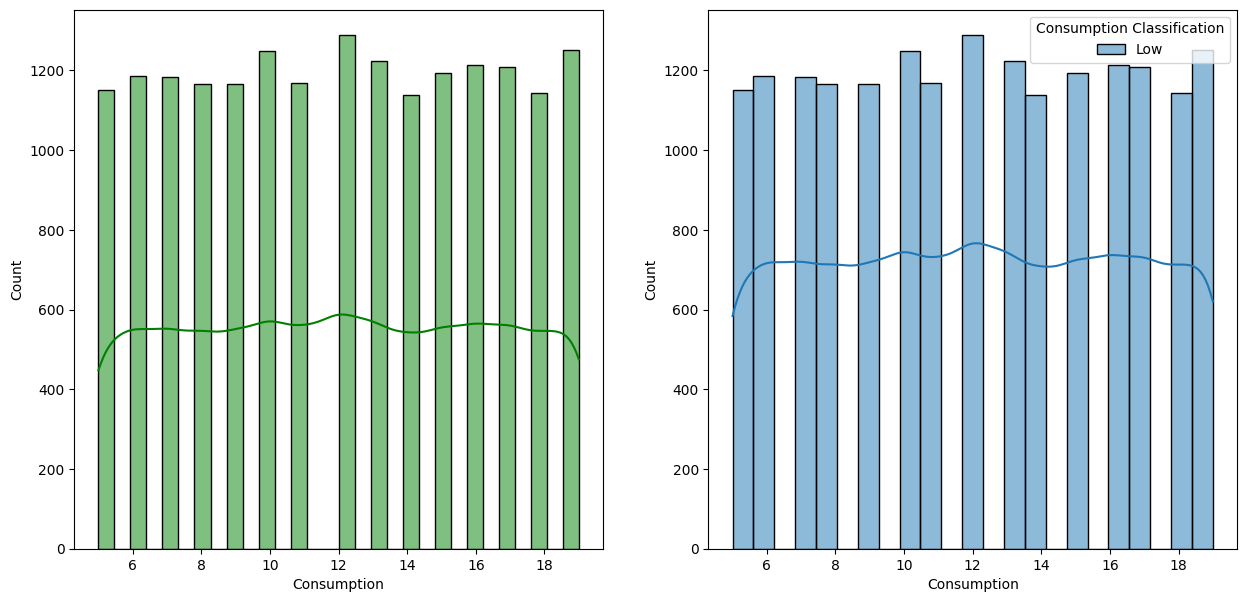

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Consumption',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Consumption',kde=True,hue='Consumption Classification')
plt.show()

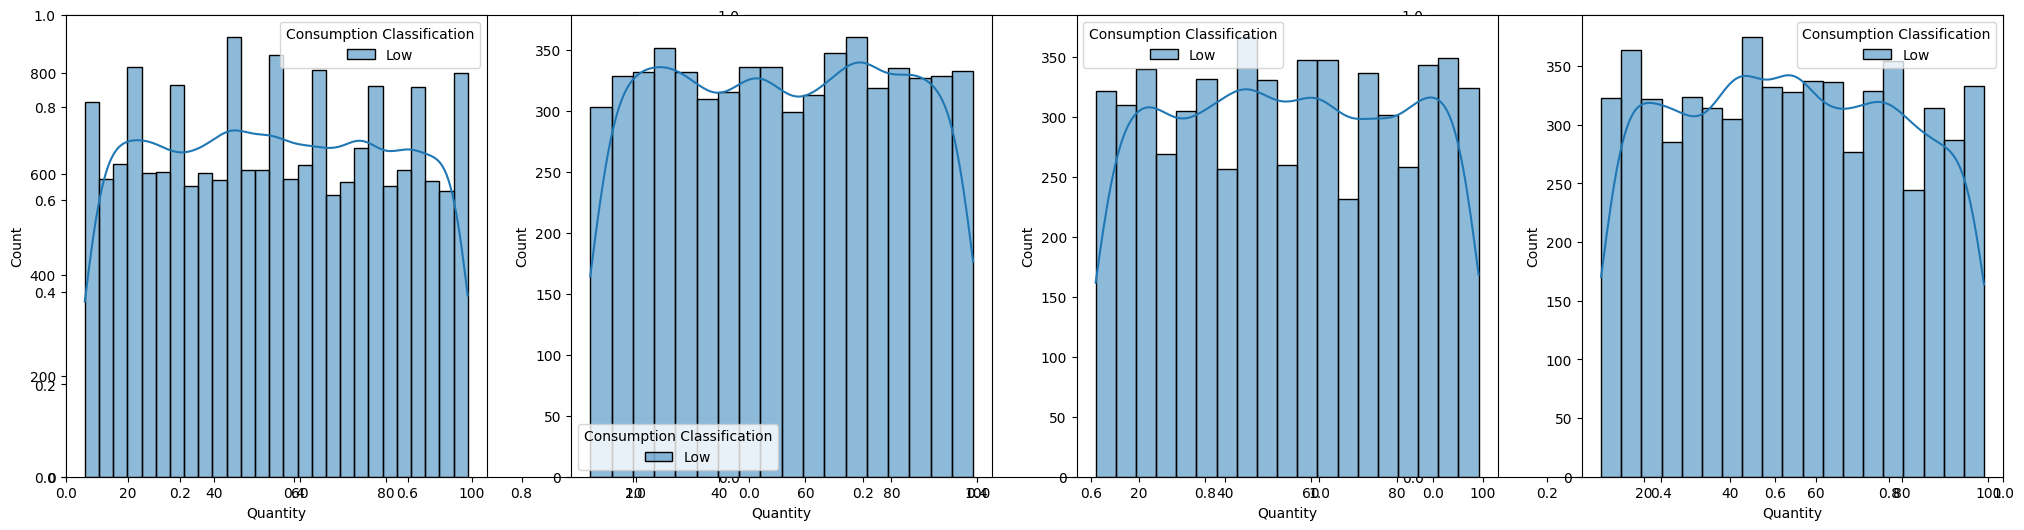

In [74]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Quantity',kde=True,hue='Consumption Classification')
plt.subplot(142)
sns.histplot(data=df[df.Location=='Chicago'],x='Quantity',kde=True,hue='Consumption Classification')
plt.subplot(143)
sns.histplot(data=df[df.Location=='Los Angeles'],x='Quantity',kde=True,hue='Consumption Classification')
plt.subplot(144)
sns.histplot(data=df[df.Location=='New York'],x='Quantity',kde=True,hue='Consumption Classification')

plt.show()

### PIE CHARTS

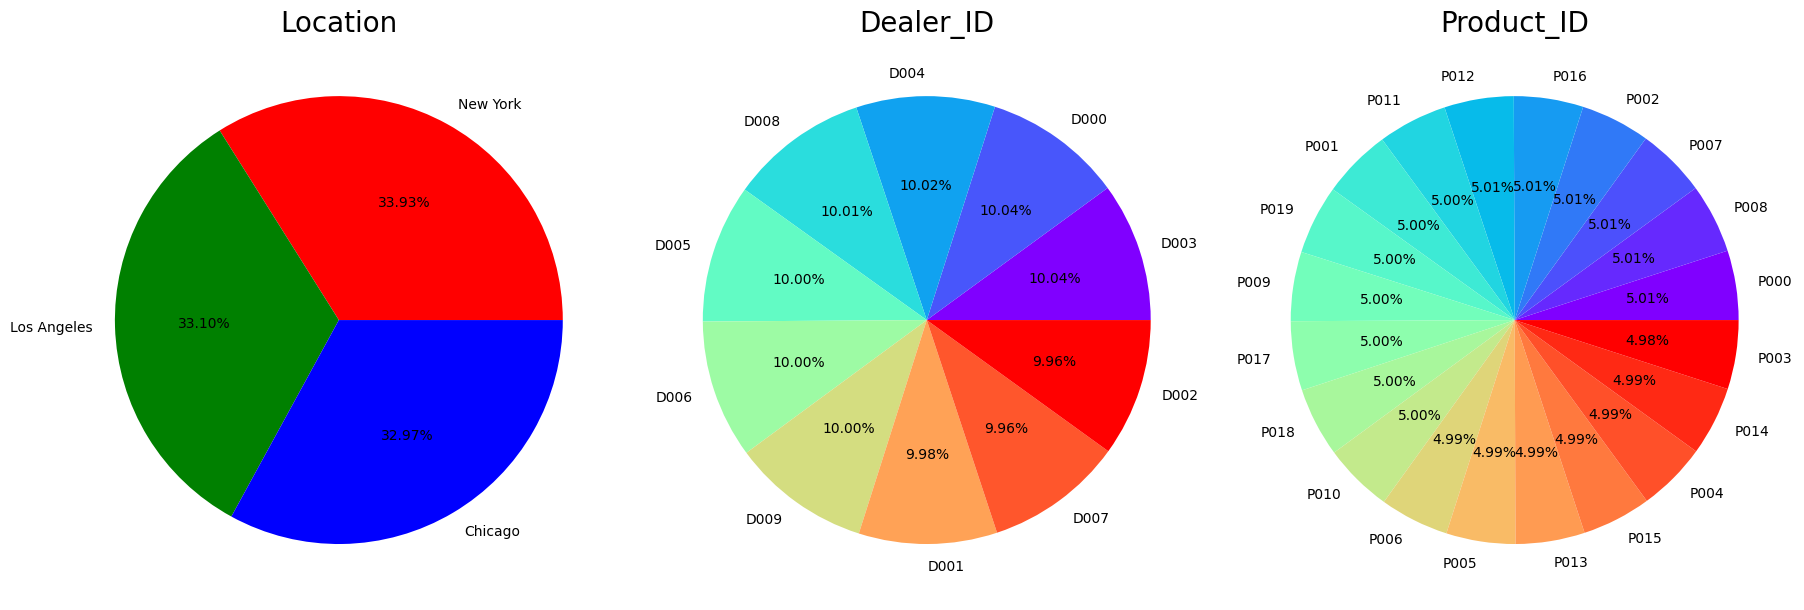

In [79]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# 🔹 Location Pie Chart
plt.subplot(1, 5, 1)
size = df['Location'].value_counts()
labels = size.index  
colors = ['red', 'green', 'blue']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Location', fontsize=20)
plt.axis('off')

# 🔹 Dealer_ID Pie Chart
plt.subplot(1, 5, 2)
size = df['Dealer_ID'].value_counts()
labels = size.index  
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Dealer_ID', fontsize=20)
plt.axis('off')

# 🔹 Product_ID Pie Chart
plt.subplot(1, 5, 3)
size = df['Product_ID'].value_counts()
labels = size.index  
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Product_ID', fontsize=20)
plt.axis('off')

# 🔹 Consumption Classification Pie Chart
# plt.subplot(1, 5, 4)
# size = df['Consumption Classification'].value_counts()
# labels = size.index  
# colors = ['red', 'green', 'blue']
# plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
# plt.title('Consumption Level', fontsize=20)
# plt.axis('off')

# 🔹 Adjust Layout & Show
plt.tight_layout()
plt.show()


C:\Users\CVR\AppData\Local\Temp\ipykernel_1856\341840262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


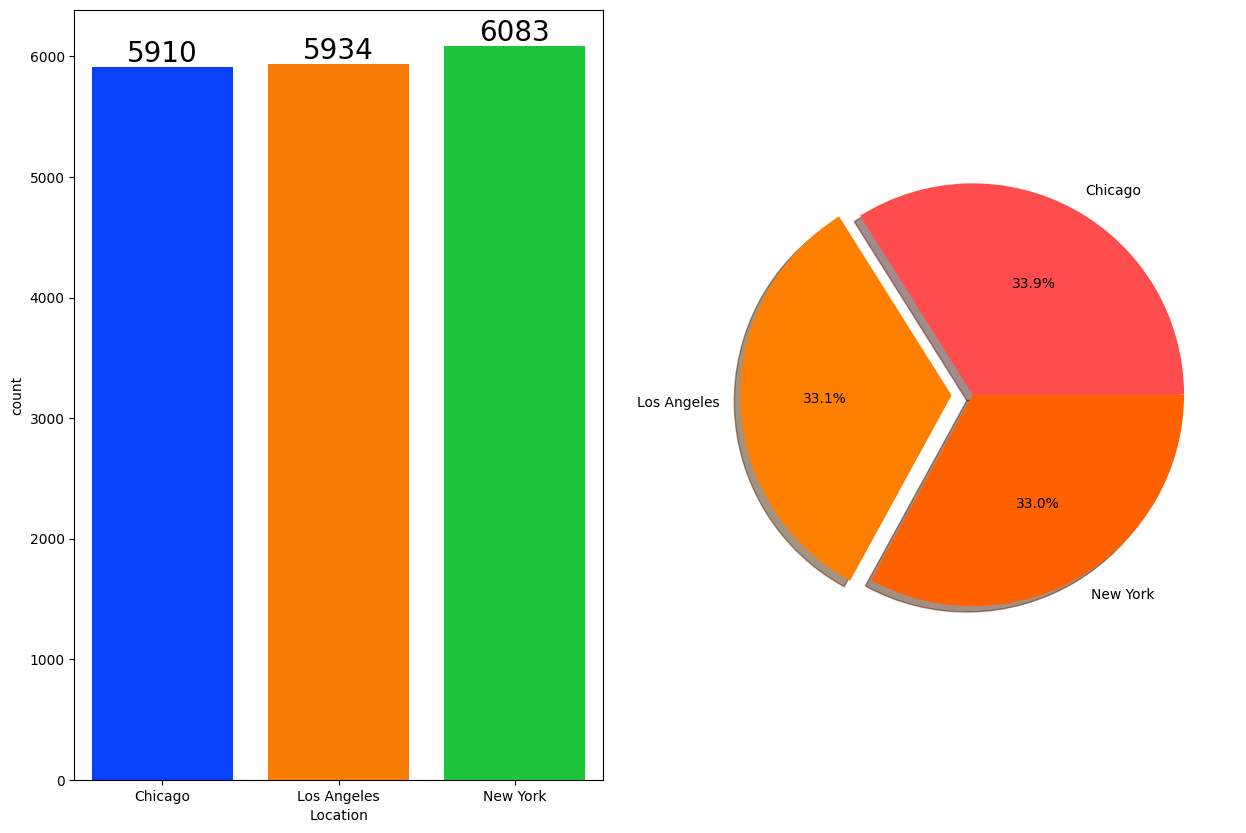

In [84]:
f,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(x=df['Location'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Location'].value_counts(),labels=['Chicago','Los Angeles','New York'],explode=[0,0.1,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000','#ff6000'])
plt.show()

In [85]:
location_group = df.groupby('Location')
location_group

Available locations: Index(['Chicago', 'Los Angeles', 'New York'], dtype='object', name='Location')


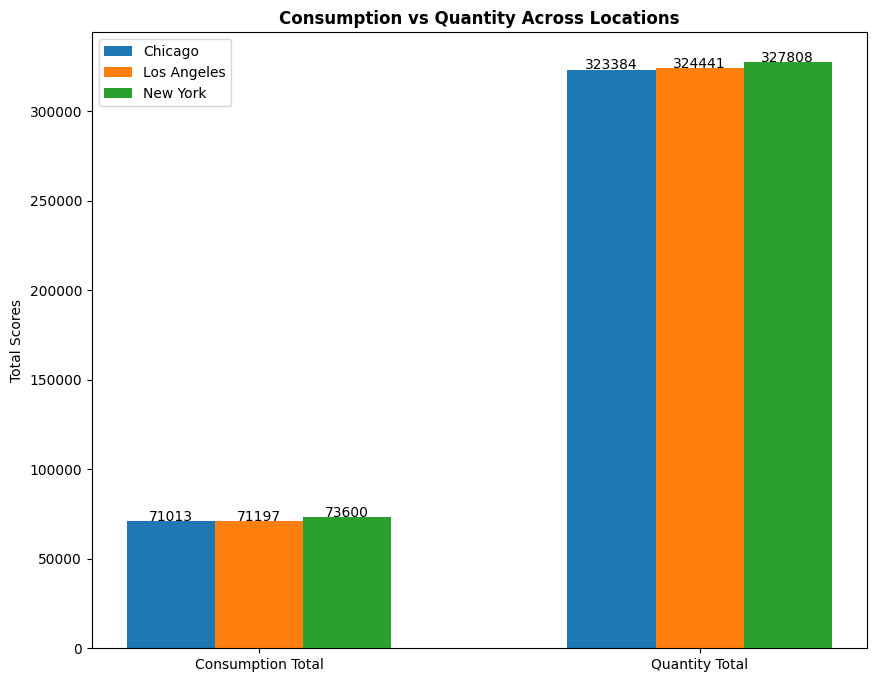

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure only numeric columns are summed
location_group = df.groupby('Location').sum(numeric_only=True)

# Dynamically check available locations
print("Available locations:", location_group.index)

# Extracting required data dynamically
locations = ["Chicago", "Los Angeles", "New York"]  # Define expected locations
valid_locations = [loc for loc in locations if loc in location_group.index]  # Ensure they exist

# Prepare scores dynamically
scores = {loc: [location_group.loc[loc, 'Consumption'], location_group.loc[loc, 'Quantity']]
          for loc in valid_locations}

# Plot setup
plt.figure(figsize=(10, 8))
X = ['Consumption Total', 'Quantity Total']
X_axis = np.arange(len(X))
width = 0.2  # Bar width

# Loop through valid locations and plot bars
for i, loc in enumerate(valid_locations):
    plt.bar(X_axis + (i - 1) * width, scores[loc], width, label=loc)  

# Set x-axis labels and title
plt.xticks(X_axis, X)
plt.ylabel("Total Scores")
plt.title("Consumption vs Quantity Across Locations", fontweight='bold')

# Add data labels on bars
for i, loc in enumerate(valid_locations):
    for j, value in enumerate(scores[loc]):
        plt.text(X_axis[j] + (i - 1) * width, value + 50, f'{value:.0f}', ha='center', fontsize=10)

# Show legend and plot
plt.legend()
plt.show()


### Dealer Columns

C:\Users\CVR\AppData\Local\Temp\ipykernel_1856\1205949043.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


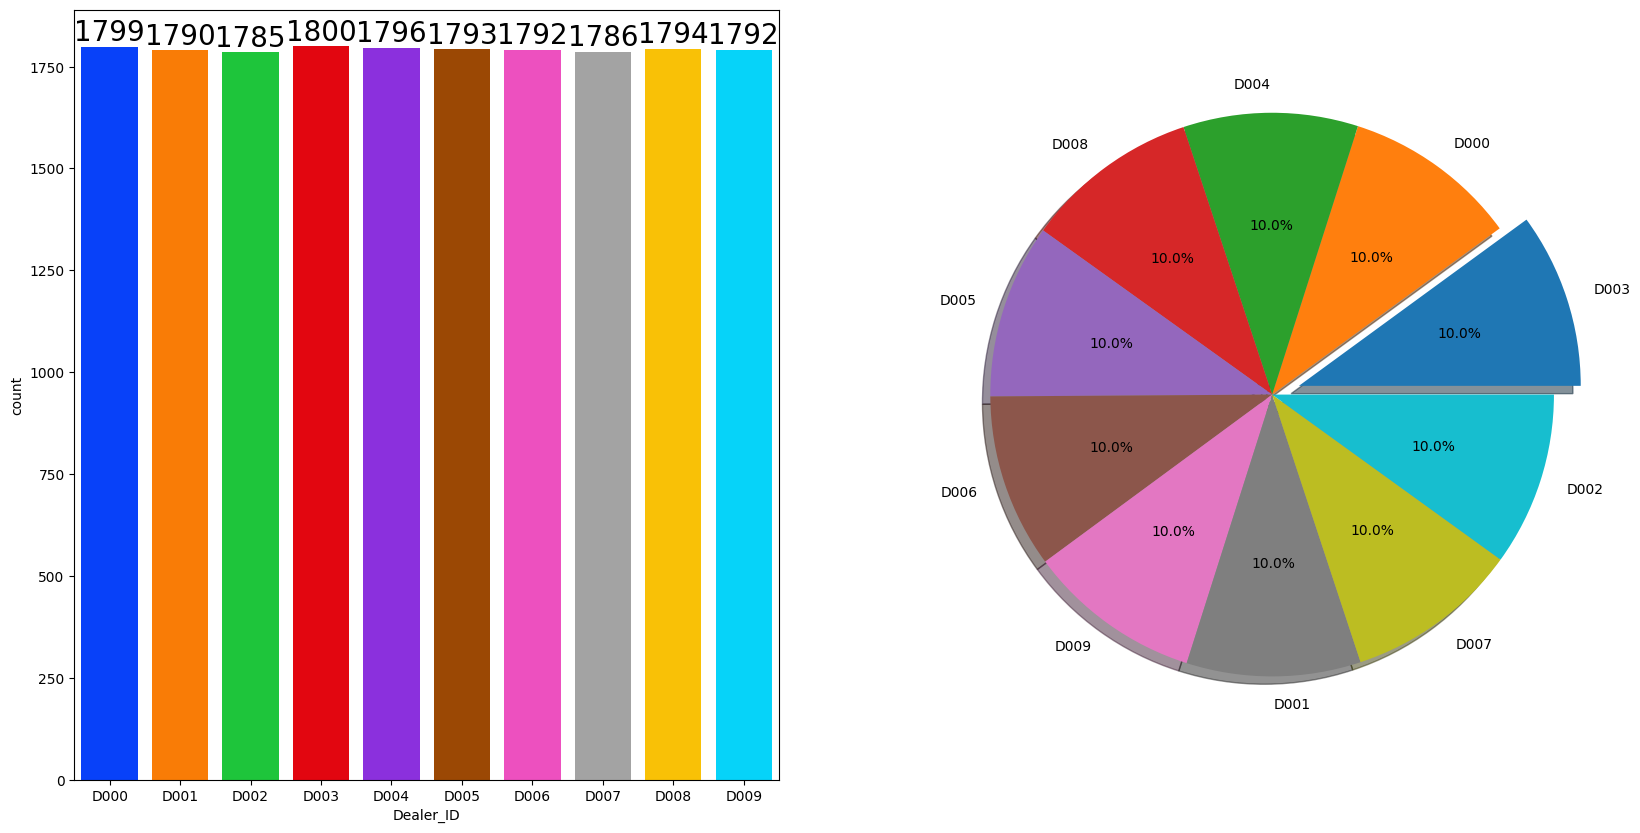

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Dealer_ID'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Dealer_ID'].value_counts(),labels=df['Dealer_ID'].value_counts().index,explode=[0.1,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

UNIVARIATE ANALYSIS ( What is the most product most used? )

C:\Users\CVR\AppData\Local\Temp\ipykernel_1856\1092054484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Product_ID'], palette = 'Blues')


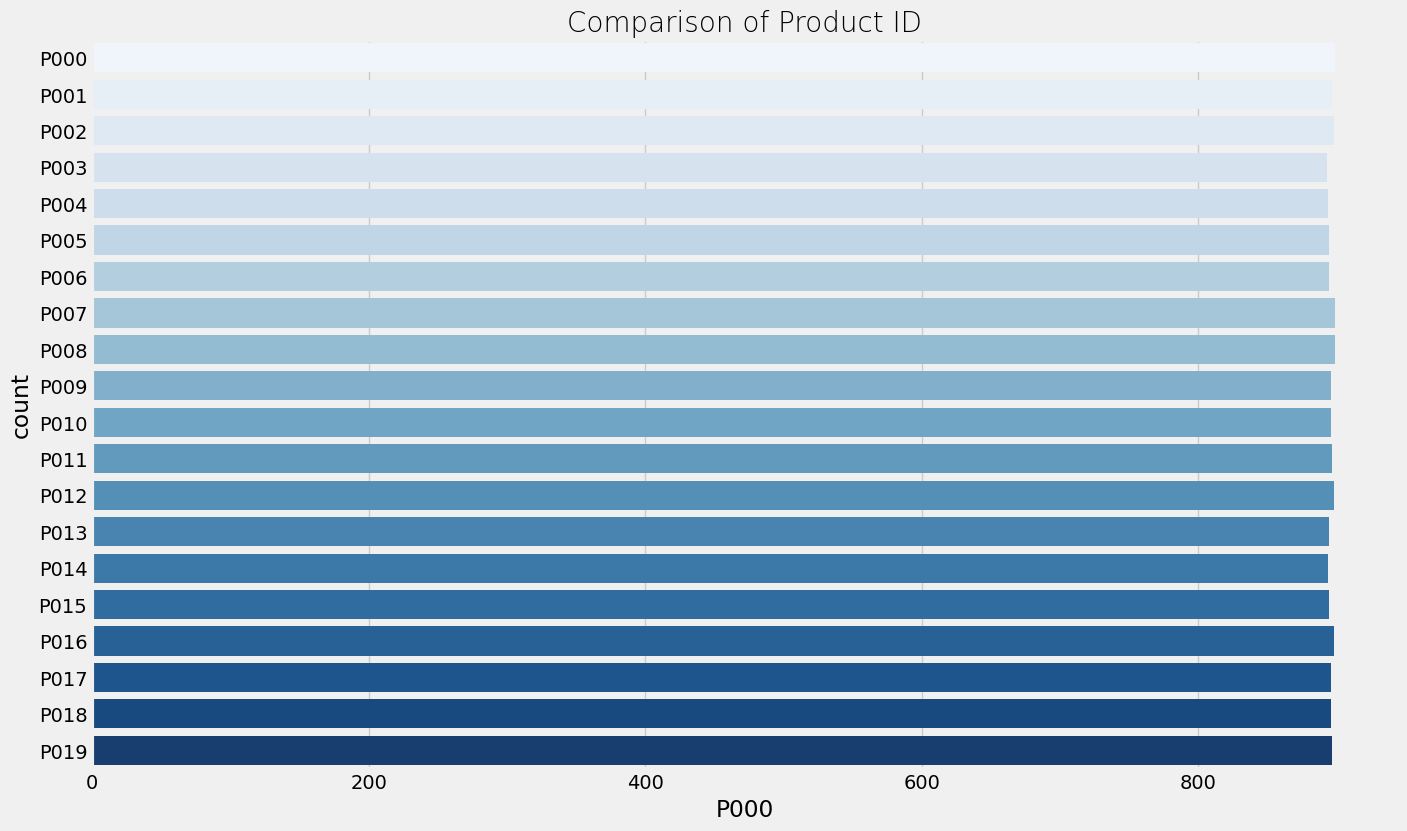

In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Product_ID'], palette = 'Blues')
plt.title('Comparison of Product ID', fontweight = 30, fontsize = 20)
plt.xlabel('P000')
plt.ylabel('count')
plt.show()